In [1]:
import tensorflow as tf

train_dataset_filepath = './FER-2013/train/'
img_dim = (48, 48)

train_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_filepath,
    seed=468,
    validation_split=0.15,
    color_mode='grayscale',
    image_size=img_dim,
    batch_size=32,
    subset='both'
)


Found 28709 files belonging to 7 classes.
Using 24403 files for training.
Using 4306 files for validation.


In [77]:
test_dataset_filepath = './FER-2013/test/'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_filepath,
    seed=468,
    color_mode='grayscale',
    image_size=img_dim,
    batch_size=32,
)

Found 7178 files belonging to 7 classes.


In [2]:
classes = train_ds.class_names
print(classes)


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


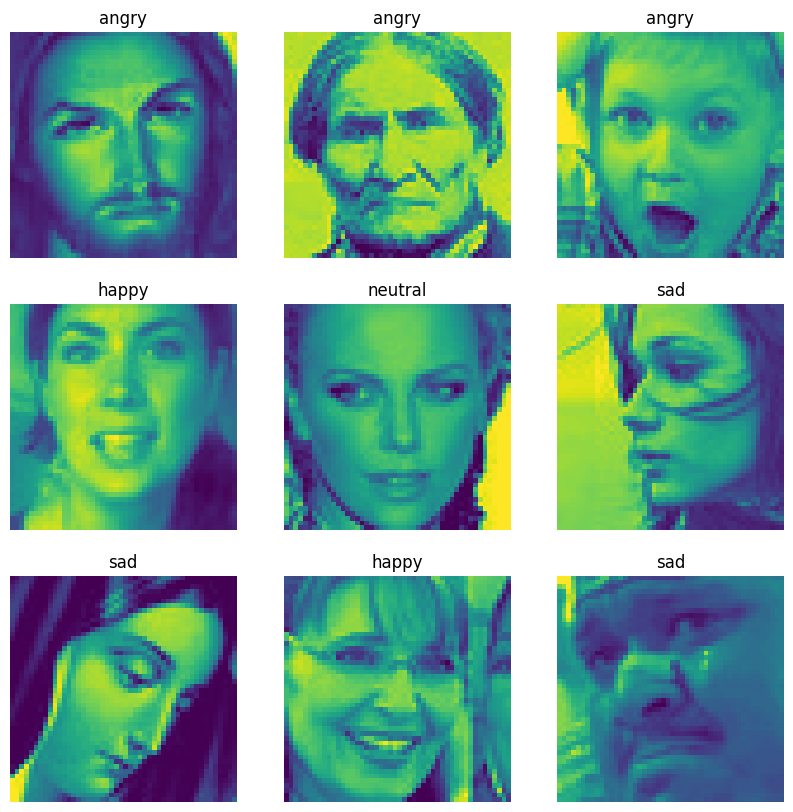

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")


In [4]:
units = len(classes)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(units, activation='softmax'))

In [5]:
loss = tf.keras.losses.sparse_categorical_crossentropy
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        1

In [8]:
def train_model(model, epochs):
    return model.fit(x=train_ds, epochs=epochs, validation_data=val_ds, batch_size=32, verbose=1)

In [9]:
epochs = 25
history = train_model(model, epochs)


Epoch 1/25
763/763 [==============================] - 61s 79ms/step - loss: 1.6816 - accuracy: 0.3300 - val_loss: 1.5764 - val_accuracy: 0.3943
Epoch 2/25
763/763 [==============================] - 60s 79ms/step - loss: 1.5008 - accuracy: 0.4245 - val_loss: 1.4600 - val_accuracy: 0.4450
Epoch 3/25
763/763 [==============================] - 61s 80ms/step - loss: 1.4059 - accuracy: 0.4622 - val_loss: 1.3991 - val_accuracy: 0.4698
Epoch 4/25
763/763 [==============================] - 58s 76ms/step - loss: 1.3291 - accuracy: 0.4941 - val_loss: 1.3554 - val_accuracy: 0.4875
Epoch 5/25
763/763 [==============================] - 56s 73ms/step - loss: 1.2723 - accuracy: 0.5168 - val_loss: 1.3192 - val_accuracy: 0.5016
Epoch 6/25
763/763 [==============================] - 55s 72ms/step - loss: 1.2191 - accuracy: 0.5410 - val_loss: 1.3066 - val_accuracy: 0.5021
Epoch 7/25
763/763 [==============================] - 59s 77ms/step - loss: 1.1796 - accuracy: 0.5564 - val_loss: 1.3039 - val_accuracy:

In [75]:
def plot_accuracy(history, epochs):
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.plot(range(epochs),
             history.history['accuracy'], label='Training Accuracy')
    plt.plot(range(epochs),
             history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(epochs), history.history['loss'], label='Training Loss')
    plt.plot(range(epochs),
             history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')

    plt.show()

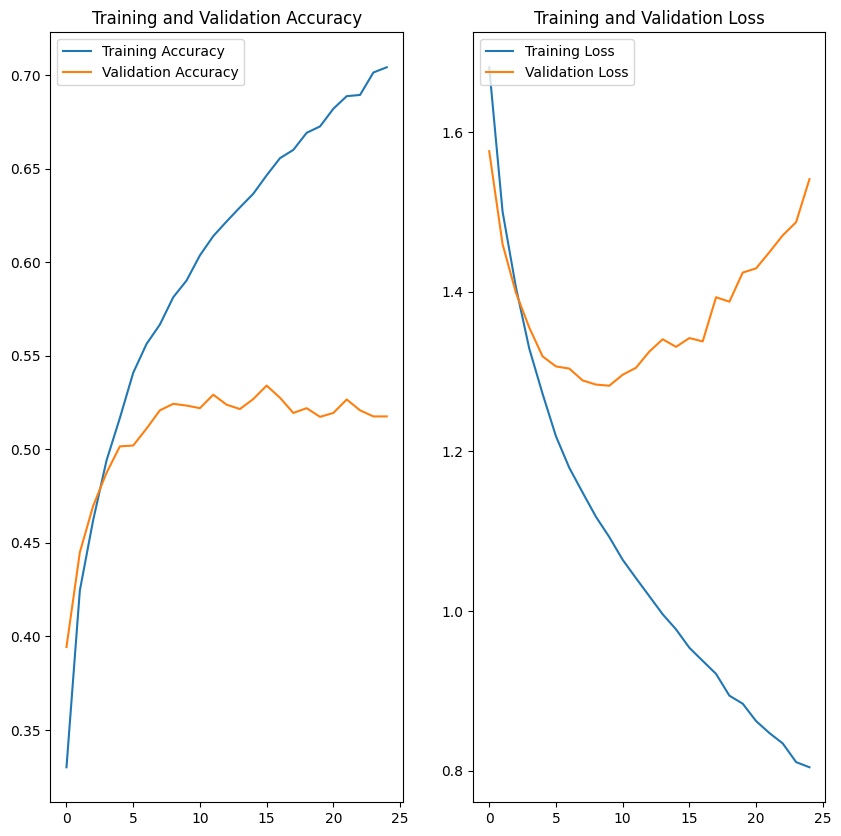

In [12]:
plot_accuracy()

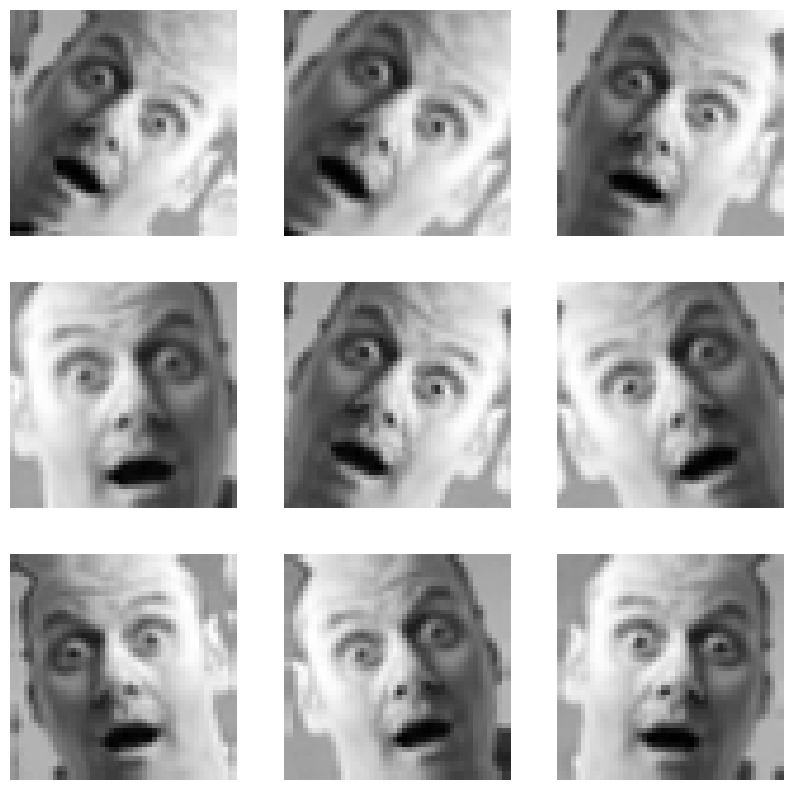

In [24]:
data_augmentation = tf.keras.Sequential()
data_augmentation.add(tf.keras.layers.RandomFlip("horizontal"))
data_augmentation.add(tf.keras.layers.RandomRotation(0.1))
data_augmentation.add(tf.keras.layers.RandomZoom(0.1))

plt.figure(figsize=(10, 10))

image, label = next(iter(train_ds))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.gray()
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [66]:

units = len(classes)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.InputLayer(input_shape=(img_dim[0], img_dim[1], 1)))
model2.add(data_augmentation)
model2.add(tf.keras.layers.Rescaling(1./255)) # Standardization 
model2.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(16, activation='relu'))
model2.add(tf.keras.layers.Dense(units, activation='softmax'))

In [35]:
loss = tf.keras.losses.sparse_categorical_crossentropy
model2.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
print(model2.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 48, 48, 1)         0         
                                                                 
 rescaling_2 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                 

In [50]:
history = train_model(model2, epochs)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

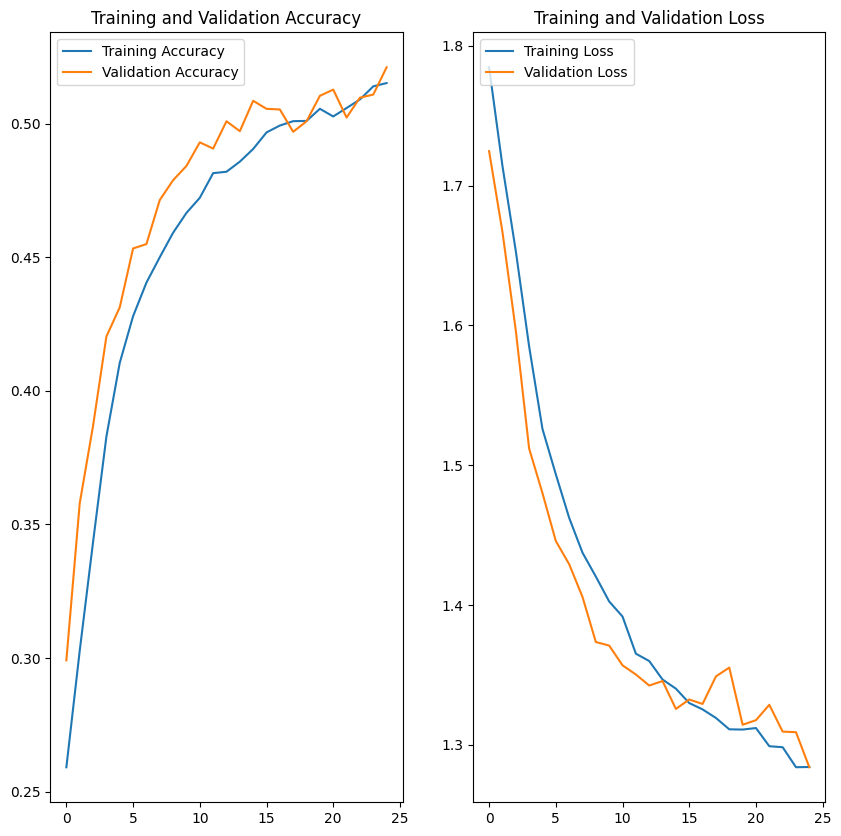

In [38]:
plot_accuracy(history)

In [67]:
loss = tf.keras.losses.sparse_categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(5e-4)
model2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
print(model2.summary())

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 48, 48, 1)         0         
                                                                 
 rescaling_10 (Rescaling)    (None, 48, 48, 1)         0         
                                                                 
 conv2d_31 (Conv2D)          (None, 48, 48, 128)       1280      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 24, 24, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 24, 24, 64)        73792     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                

In [68]:
history = train_model(model2, 50)

Epoch 1/50
763/763 [==============================] - 135s 171ms/step - loss: 1.8081 - accuracy: 0.2528 - val_loss: 1.7776 - val_accuracy: 0.2534
Epoch 2/50
763/763 [==============================] - 130s 170ms/step - loss: 1.7573 - accuracy: 0.2667 - val_loss: 1.7048 - val_accuracy: 0.3144
Epoch 3/50
763/763 [==============================] - 127s 166ms/step - loss: 1.7032 - accuracy: 0.3125 - val_loss: 1.6522 - val_accuracy: 0.3637
Epoch 4/50
763/763 [==============================] - 122s 160ms/step - loss: 1.6377 - accuracy: 0.3541 - val_loss: 1.5712 - val_accuracy: 0.3843
Epoch 5/50
763/763 [==============================] - 122s 160ms/step - loss: 1.5653 - accuracy: 0.3925 - val_loss: 1.4986 - val_accuracy: 0.4322
Epoch 6/50
763/763 [==============================] - 124s 162ms/step - loss: 1.5194 - accuracy: 0.4115 - val_loss: 1.4678 - val_accuracy: 0.4361
Epoch 7/50
763/763 [==============================] - 124s 163ms/step - loss: 1.4742 - accuracy: 0.4338 - val_loss: 1.4297 -

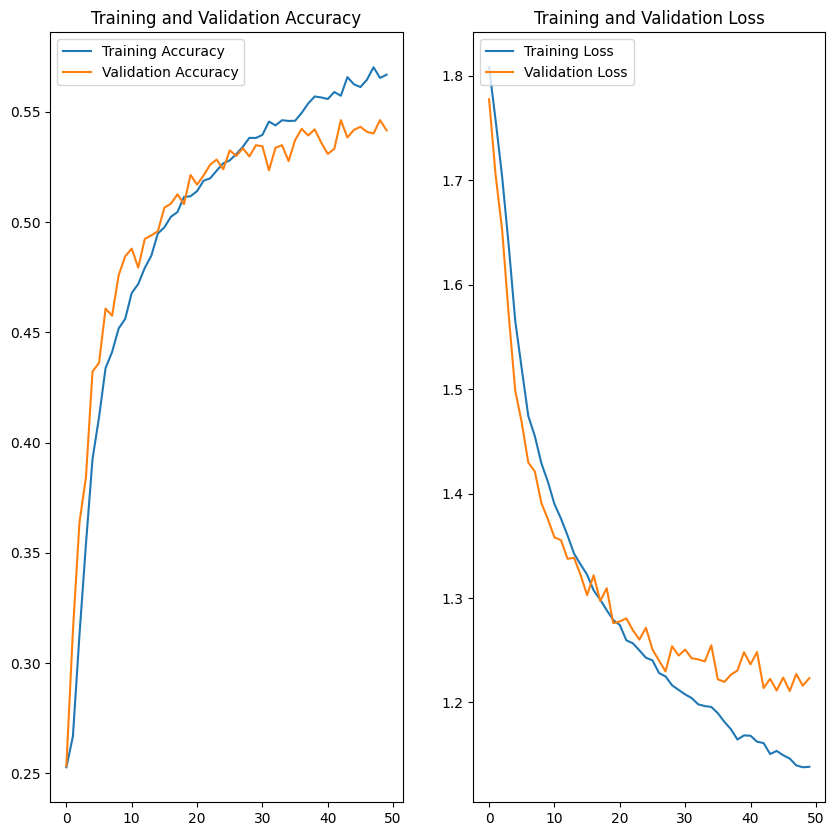

In [76]:
plot_accuracy(history, 50)

In [78]:

# test model on test image

perf = model.evaluate(test_ds)
print("evaluate: " , perf)

225/225 [==============================] - 12s 50ms/step - loss: 1.5988 - accuracy: 0.5059
evaluate:  [1.5988167524337769, 0.5058512091636658]


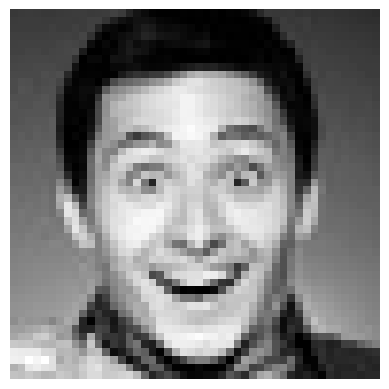

1/1 [==============================] - 0s 35ms/step
Predictions:
 [[3.7243587e-06 7.3719690e-11 1.2477813e-04 9.7813100e-01 2.1290987e-05
  6.0840449e-08 2.1719178e-02]]
angry :  [0.00037244]
disgust :  [7.371969e-09]
fear :  [0.01247781]
happy :  [97.8131]
neutral :  [0.0021291]
sad :  [6.084045e-06]
surprise :  [2.171918]

Most likely class: happy


In [98]:
import numpy as np
def test_model(img_url):

    img = tf.keras.preprocessing.image.load_img(img_url, target_size=(48, 48))
    img = tf.image.rgb_to_grayscale(img)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    plt.imshow(img_array/255)
    plt.axis('off')
    plt.show()

    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    print('Predictions:\n', predictions)
    
    for i, c in enumerate(classes):
        print(c , ": ",  predictions[0][[i]] * 100)
    
    prediction = classes[np.argmax(predictions)]
    print("\nMost likely class: " + prediction)


test_model('./FER-2013/test/surprise/PrivateTest_10712253.jpg')


In [ ]:
train_loss, train_accu = fernet.evaluate(training_set)
test_loss, test_accu = fernet.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))